### Apply maskSLIC vs SLIC
[link to example](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_mask_slic.html#sphx-glr-auto-examples-segmentation-plot-mask-slic-py)

This example is about comparing the segmentations obtained using the plain SLIC method and its masked version maskSLIC.

The maskSLIC mathod is an extension of the SLIC method for the generation of superpixels in a region of intrest. maskSLIC is able to overcome border problems that affects SLIC method, particularly in case of irregular mask.

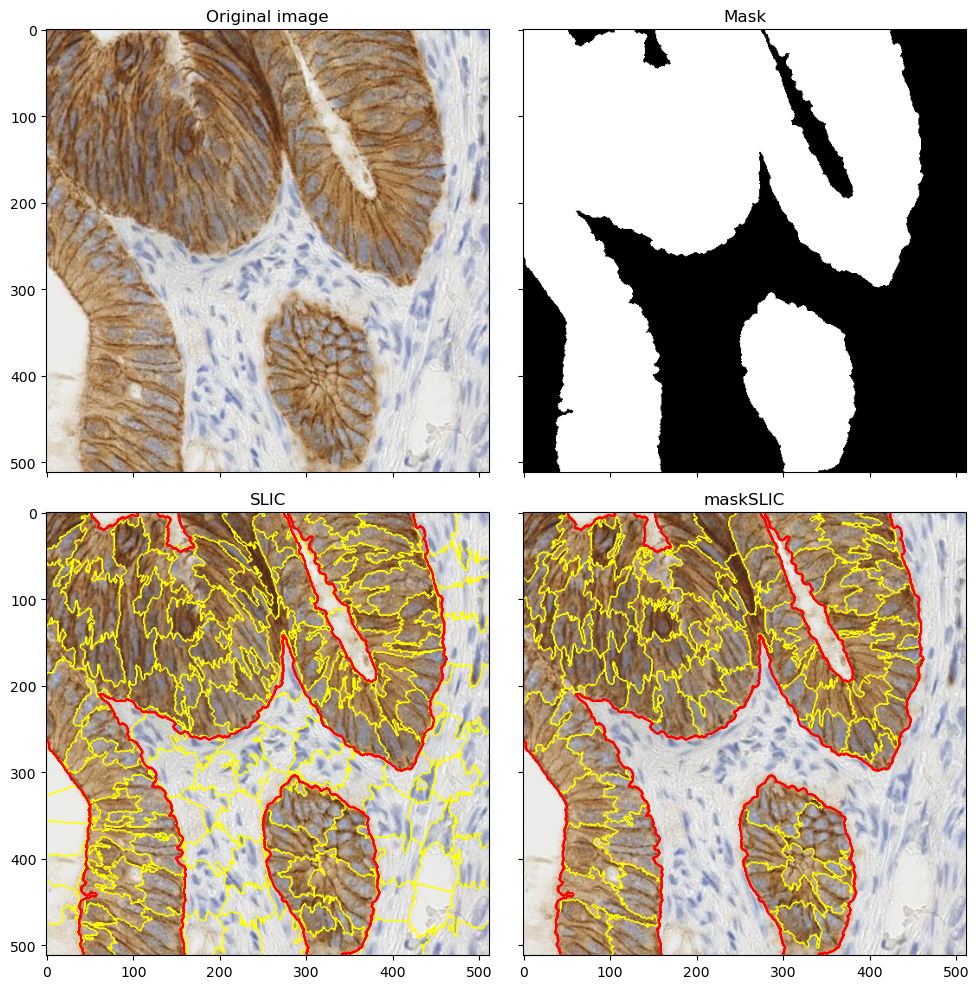

In [7]:
import matplotlib.pyplot as plt

from skimage import data, color, morphology, segmentation

img = data.immunohistochemistry()

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(lum < 0.7, 500), 
    500
)

mask = morphology.opening(mask, morphology.disk(3))

slic = segmentation.slic(img, n_segments = 200, start_label=1)
m_slic = segmentation.slic(img, n_segments=100, mask=mask, start_label=1)

# Display results
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1,ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

plt.tight_layout()
plt.show()